# BCDS Project Case No. 1
#### Group D

| Student Name |
| :- |
| Diogo Martins |
| Jaime Duarte |
| David Martins |
| Shanjida Roman |
| Yousef Ebrahimi |


## Table of Contents

* [Dataset description](#Datasetdescription)
* [1. Initial setup and modules](#Initialsetupandmodules)
* [2. Data understanding](#Dataunderstanding)
    * [2.1 Duplicated Values](#Duplicatedvalues)
    * [2.2 Coherence Check](#CoherenceCheck)
* [3.Data Cleaning and Preprocessing](#DataCleaningandPreprocessing)
    * [3.1 Missing Values](#missingvalues)
    * [3.2 Outliers](#outliers)
    * [3.3 Feature Engeneering](#featureengeneering)
    * [3.4 Feature selection/elimination](#featureselection)
* [4. Data visualization](#Datavisualization)
* [5. Data Normalization and Encoding](#normalization&encoding)
    * [5.1 Normalization](#normalization)
    * [5.2 Encoding](#encoding)
    * [5.3 Merging](#merging)
* [6. PCA](#pca)
* [7. Clustering](#clustering)
* [8. Conclusion](#conclusion)
* [9. Results](#results)

Problem:
Until 2015 hotel chain C operated 4 hotels, however, with the
acquisition of new hotels, the hotel chain board decided to invest
more in marketing.
However, it was not until 2018 that the hotel chain created a
marketing department and hired a new marketing manager, A.
A realized that the current customer segmentation was not
adequate, as it only reflected one only customer characteristic, its
sales origin. It did not reflect geographic characteristics, such as the
country of origin, demographic characteristics, such as age, or
behavioral characteristics, such as the number of stays.
Without proper customer segmentation, it is difficult for A to define
a strategy to reach new customers and to continue to captivate the
current customers.
Taking into consideration the multiple distribution channels that
hotels operate nowadays (travel agencies, travel operators, online
travel agencies – OTA, brand websites, meta searchers websites,
among others). For example, corporate customers tend to make
reservations very near the arrival date, book directly with the hotel,
and be willing to pay more for a better-equipped room, while a
customer on holiday tends to make reservations more distant from
the arrival date, book with a travel operator or OTA, and to look for
better price opportunities.
Therefore, products “creation”, pricing definitions, and other
marketing tasks, such as advertising, must take into consideration
the targets of its efforts according to the different channels and
groups of customers.


1. Explore the data and identify the variables that should be used to
segment customers
2. Use K-Means clustering to identify customers segments
1. Justify your selection of K (taking into consideration the business use)
2. Use PCA to reduce dimensionality and speed-up model development
3. Suggest business applications for the findings

### Dataset description <a class="anchor" id="Datasetdescription"></a>

Dataset related with direct marketing campaigns of a Portuguese hotel institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be subscribed.

#### Hotel (2015) client data:

* ID: *: Customer ID
* Nationality *: Nationality of the customer in ISO 3166-1 (Alpha 3) format 
* Age: *: The age of the customer was created 
* DaysSinceCreation: *: Number of elapsed days since the customer was created
* NameHash: *: Hash of the customer´s name 
* DaysSinceCreation *: Number of elapsed days since the customer 
* DocIDHash: *: Hash of the customer’s personal document identification number (usually a passport or ID card) 
* AverageLeadTime *: Average number of days before arrival date the customer makes bookings
* LodgingRevenue *: Total amount of lodging revenue paid by the customer so far 
* OtherRevenue *: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far 
* BookingsCanceled *: Number of bookings the customer made but subsequently canceled 
* BookingsNoShowed *: Number of bookings the customer made but subsequently made a "no-show" 
* BookingsCheckedin *: Number of bookings the customer made, which actually ended up staying personNights: Total person/nights the customer has stayed at the hotel so far
* Persons/Nights *: Sum of Adults and Children in each booking, multiplied by the number of Nights Length-of-stay) of the booking
* RoomNights *: Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-ofstay) of the booking 
* DistributionChannel *: Distribution channel normally used by the customer to make bookings at the hotel
* MarketSegment *: Current market segment of the customer 
* SRHighFloor *: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)
* RLowFloor *: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes) 
* SRAccessibleRoom *: Indication if the customer usually asks for an accessible room (0: No, 1: Yes) 
* SRMediumFloor *: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes) 
* SRBathtub  *: Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)
* SRShower *: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes) 
* SRCrib *: Indication if the customer usually asks for a crib (0: No, 1: Yes)
* RKingSizeBed *: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes) 
* SRTwinBed  *: Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes) 
* SRNearElevator *: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes) 
* SRAwayFromElevator *: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes) 
* SRNoAlcoholInMiniBar *: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)
* RQuietRoom *: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes) 


NOTE: All time-based columns (e.g., Age or DaysSinceCreation) were calculated at the dataset extraction date.

## 1.Initial setup and modules <a class="anchor" id="Initialsetupandmodules"></a>

In [3]:
!pip install joypy
!pip install yellowbrick
!pip install --upgrade category_encoders

In [4]:
# Packages

import os
import csv
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import KNNImputer
from math import ceil
import joypy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly.express as px

import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance


In [5]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [6]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

## 2. Data understanding <a class="anchor" id="Dataunderstanding"></a>

In [7]:
# Load data 
ds = pd.read_csv('Case1_HotelCustomerSegmentation.csv', sep=";")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    111733 non-null  int64  
 1   Nationality           111733 non-null  object 
 2   Age                   107561 non-null  float64
 3   DaysSinceCreation     111733 non-null  int64  
 4   NameHash              111733 non-null  object 
 5   DocIDHash             110732 non-null  object 
 6   AverageLeadTime       111733 non-null  int64  
 7   LodgingRevenue        111733 non-null  float64
 8   OtherRevenue          111733 non-null  float64
 9   BookingsCanceled      111733 non-null  int64  
 10  BookingsNoShowed      111733 non-null  int64  
 11  BookingsCheckedIn     111733 non-null  int64  
 12  PersonsNights         111733 non-null  int64  
 13  RoomNights            111733 non-null  int64  
 14  DistributionChannel   111733 non-null  object 
 15  

Data Info.:
* The total rows are 111733 rows and 29 columns

In [8]:
ds.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [9]:
# Display top 5 rows
ds.head(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Summary statistics for all variables
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,111733.0,NaN,NaN,NaN,55867.0,32254.683151,1.0,27934.0,55867.0,83800.0,111733.0
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561.0,NaN,NaN,NaN,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.0
DaysSinceCreation,111733.0,NaN,NaN,NaN,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.0
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733.0,NaN,NaN,NaN,60.833147,85.11532,-1.0,0.0,21.0,95.0,588.0
LodgingRevenue,111733.0,NaN,NaN,NaN,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.0
OtherRevenue,111733.0,NaN,NaN,NaN,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,NaN,NaN,NaN,0.002282,0.080631,0.0,0.0,0.0,0.0,15.0


### 2.1 Duplicated Values <a class="anchor" id="Duplicatedvalues"></a>

In [11]:
ds_original=ds.copy()

In [12]:
ds_original

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,...,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.0,36,0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...,0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...,66,708.00,185.0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Setting the ID as an index
ds.set_index('ID', inplace=True)
ds

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,...,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
# Duplicated observations
ds.duplicated().sum()

111

In [15]:
#Elimination of duplicated observations
ds.drop_duplicates(inplace=True)

In [16]:
ds.duplicated().sum()

0

### 2.2 Coherence Check <a class="anchor" id="CoherenceCheck"></a>

#### Checking for incoherences in the hashes variables

In [17]:
print(ds.duplicated(['NameHash']).sum())
print(ds.duplicated(['DocIDHash']).sum())

4038
8141


In [18]:
#Number of unique DocIDHash values before running the code
print(ds['DocIDHash'].nunique())

103480


In [19]:
#creating a dataset while only keeping the rows which have the same DocIDHash associated to the same age
duplicatedDataset = ds.loc[(ds.duplicated(['DocIDHash'], keep=False))&(~ds.duplicated(['Age','DocIDHash'], keep=False))]

In [20]:
def modefinder(x):
    if np.isnan(x).all():
        return np.NaN
    else:
        return stats.mode(x)[0][0]


duplicates_aggregation_functions = {
    'AverageLeadTime': lambda x: max(x, key=modefinder),
    'LodgingRevenue': lambda x: sum(x),
    'OtherRevenue': lambda x: sum(x),
    'BookingsCanceled': lambda x: sum(x),
    'BookingsNoShowed': lambda x: sum(x),
    'BookingsCheckedIn': lambda x: sum(x),
    'PersonsNights': lambda x: sum(x),
    'RoomNights': lambda x: sum(x),
}


#Group the dataset by DocIDHash and apply the aggregation functions to all the other columns.
aggregatedDuplicates = duplicatedDataset.groupby(duplicatedDataset['DocIDHash']).aggregate(duplicates_aggregation_functions)

In [21]:
# Merge the aggregated data back into the original dataset
merged = ds.merge(aggregatedDuplicates, on='DocIDHash', how='left')

# Replace the original columns with the aggregated values where available
merged['AverageLeadTime'] = merged['AverageLeadTime_y'].fillna(merged['AverageLeadTime_x'])
merged['LodgingRevenue'] = merged['LodgingRevenue_y'].fillna(merged['LodgingRevenue_x'])
merged['OtherRevenue'] = merged['OtherRevenue_y'].fillna(merged['OtherRevenue_x'])
merged['BookingsCanceled'] = merged['BookingsCanceled_y'].fillna(merged['BookingsCanceled_x'])
merged['BookingsNoShowed'] = merged['BookingsNoShowed_y'].fillna(merged['BookingsNoShowed_x'])
merged['BookingsCheckedIn'] = merged['BookingsCheckedIn_y'].fillna(merged['BookingsCheckedIn_x'])
merged['PersonsNights'] = merged['PersonsNights_y'].fillna(merged['PersonsNights_x'])
merged['RoomNights'] = merged['RoomNights_y'].fillna(merged['RoomNights_x'])

# Drop the duplicated columns
merged = merged.drop(columns=['AverageLeadTime_x', 'LodgingRevenue_x', 'OtherRevenue_x', 'BookingsCanceled_x',                              'BookingsNoShowed_x', 'BookingsCheckedIn_x', 'PersonsNights_x', 'RoomNights_x',                              'AverageLeadTime_y', 'LodgingRevenue_y', 'OtherRevenue_y', 'BookingsCanceled_y',                              'BookingsNoShowed_y', 'BookingsCheckedIn_y', 'PersonsNights_y', 'RoomNights_y'])

# Sort the merged dataset by DocIDHash
merged = merged.sort_values('DocIDHash')

In [22]:
# Number of unique DocIDHash values after running the code (should be the same as before)
print(merged['DocIDHash'].nunique())

103480


In [23]:
#Checking if there are any changes to the values to confirm changes were made
merged.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nationality,111622,199,FRA,16507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107530.0,NaN,NaN,NaN,45.639896,17.244365,-10.0,33.0,47.0,58.0,123.0
DaysSinceCreation,111622.0,NaN,NaN,NaN,595.093073,374.657246,36.0,288.0,522.0,889.0,1385.0
NameHash,111622,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110690,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistributionChannel,111622,4,Travel Agent/Operator,90917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MarketSegment,111622,7,Other,63593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRHighFloor,111622.0,NaN,NaN,NaN,0.042554,0.201851,0.0,0.0,0.0,0.0,1.0
SRLowFloor,111622.0,NaN,NaN,NaN,0.001308,0.036143,0.0,0.0,0.0,0.0,1.0
SRAccessibleRoom,111622.0,NaN,NaN,NaN,0.000224,0.014964,0.0,0.0,0.0,0.0,1.0


In [24]:
#dropping duplicates now that we have the new values being applied
merged.drop_duplicates(subset=['DocIDHash'], keep=False, inplace=True)
print(merged.duplicated(['DocIDHash']).sum())

0


In [25]:
merged.shape

(100420, 28)

In [26]:
#applying changes to the ds dataframe
ds = merged.copy()

In [27]:
#Removing NameHash DocIDHash
ds.drop(['NameHash','DocIDHash'], axis=1, inplace=True)

In [28]:
ds.duplicated().sum()

2630

In [29]:
ds.drop_duplicates(inplace=True)

In [30]:
ds.sort_index(inplace=True)
ds

,Nationality,Age,DaysSinceCreation,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,...,SRNoAlcoholInMiniBar,SRQuietRoom,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
0,PRT,52.0,440,Corporate,Corporate,0,0,0,0,0,...,0,0,59.0,292.00,82.3,1.0,0.0,2.0,6.0,4.0
2,DEU,32.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,FRA,61.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,93.0,240.00,60.0,0.0,0.0,1.0,10.0,5.0
4,FRA,52.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
5,JPN,55.0,1385,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,58.0,230.00,24.0,0.0,0.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111617,DEU,31.0,36,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
111618,BRA,43.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,170.0,755.25,20.0,0.0,0.0,1.0,10.0,5.0
111619,BRA,37.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
111620,DEU,48.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,66.0,708.00,185.0,0.0,0.0,1.0,8.0,4.0


#### Checking for incoherences in the Age variable

In [31]:
age_unique = ds['Age'].unique() #negative values and the value 0
age_unique.sort()
print(age_unique)

[-10.  -9.  -8.  -6.  -5.   0.   1.   2.   3.   4.   5.   6.   7.   8.
   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.
  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.
  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.
  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
  93.  95.  97. 110. 111. 114. 115. 123.  nan]


In [32]:
#Removing negative values from Age
ds.drop(ds[ds['Age'] <1].index, inplace = True)

In [33]:
ds['Age'].unique()

array([ 52.,  32.,  61.,  55.,  50.,  33.,  43.,  26.,  28.,  59.,  57.,
        58.,  69.,  73.,  72.,  25.,  27.,  51.,  53.,  37.,  65.,  66.,
        48.,  68.,  44.,   4.,  31.,  29.,  19.,  54.,  49.,  18.,  39.,
        41.,  40.,  60.,  14.,  62.,  70.,  56.,  71.,  35.,  67.,  83.,
        36.,   7.,  63.,  nan,  64.,  46.,  38.,  30.,  11.,   9.,   8.,
         5.,  45.,  10.,  34.,   6.,  47.,  21.,  15.,  75.,  12.,  74.,
        42.,   2.,  23.,  20.,  79.,  78.,  22.,  77.,  76.,  16.,  84.,
        13.,  24.,  81.,  80.,  17.,  82., 115.,  85.,  86.,  88.,  90.,
        92.,  89.,  87.,   3.,  93., 114.,   1., 123.,  97., 110.,  91.,
       111.,  95.])

In [34]:
#Checking for incoherences in the variable AverageLeadTime
ds['AverageLeadTime'].unique()
#noticed that average lead time has a negative value which is also impossible 

array([ 59.,   0.,  93.,  58.,  38.,  96.,  60.,  87.,  11., 109.,   2.,
        95.,   7.,  94.,  85.,  78.,  13.,  67.,  65.,  80.,  61.,  98.,
        97.,  57.,  72.,  70., 103.,  49.,  86.,  41.,  69.,   1.,  99.,
        43.,  52.,  10.,  71.,  63.,  81.,  46.,  84.,  55.,  75.,  54.,
        50.,  29.,  40.,  68.,  18.,  42.,  91.,  28.,  23., 101.,  56.,
        83.,  44.,  39.,  66.,   4.,  31.,  45.,  12.,  27., 102.,  32.,
        77.,  25.,  20.,  35., 106.,  21.,   5.,  30.,  73.,   9.,  16.,
        36.,   3.,  17.,  34.,  64.,  48.,  62.,   6.,   8.,  47.,  33.,
        53.,  15., 105.,  88.,  14.,  79.,  22., 129., 137.,  92.,  51.,
        19., 132.,  26., 128.,  24., 139.,  76.,  74., 121., 126., 111.,
       147., 100.,  37., 152., 115.,  90., 117., 116., 158., 118., 114.,
       162., 133., 108., 167., 164., 161., 107., 119., 149., 124., 145.,
       113., 110., 157., 112., 130., 151., 131., 150., 134., 122., 176.,
       177., 127., 156., 189., 138., 143., 185., 13

In [35]:
#Removing negative values from AverageLeadTime
ds.drop(ds[ds['AverageLeadTime'] <0].index, inplace = True)

In [36]:
#Separating the variables between metric and non metric
metric_features= ['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue','OtherRevenue','BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']
non_metric_features= ds.columns.drop(metric_features).to_list()

In [37]:
ds

,Nationality,Age,DaysSinceCreation,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,...,SRNoAlcoholInMiniBar,SRQuietRoom,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
0,PRT,52.0,440,Corporate,Corporate,0,0,0,0,0,...,0,0,59.0,292.00,82.3,1.0,0.0,2.0,6.0,4.0
2,DEU,32.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,FRA,61.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,93.0,240.00,60.0,0.0,0.0,1.0,10.0,5.0
4,FRA,52.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
5,JPN,55.0,1385,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,58.0,230.00,24.0,0.0,0.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111617,DEU,31.0,36,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
111618,BRA,43.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,170.0,755.25,20.0,0.0,0.0,1.0,10.0,5.0
111619,BRA,37.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
111620,DEU,48.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,66.0,708.00,185.0,0.0,0.0,1.0,8.0,4.0


In [38]:
ds["BookingsCanceled"].value_counts()

0.0    97706
1.0       34
2.0        4
3.0        3
Name: BookingsCanceled, dtype: int64

## 3.Data Cleaning and Preprocessing <a class="anchor" id="DataCleaningandPreprocessing"></a>

### 3.1 Missing Values <a class="anchor" id="missingvalues"></a>

In [39]:
#creating a copy of the dataset
ds_bf_imputer = ds.copy()

In [40]:
#checking rhe missing values
ds.isna().sum()

Nationality               0
Age                     245
DaysSinceCreation         0
DistributionChannel       0
MarketSegment             0
SRHighFloor               0
SRLowFloor                0
SRAccessibleRoom          0
SRMediumFloor             0
SRBathtub                 0
SRShower                  0
SRCrib                    0
SRKingSizeBed             0
SRTwinBed                 0
SRNearElevator            0
SRAwayFromElevator        0
SRNoAlcoholInMiniBar      0
SRQuietRoom               0
AverageLeadTime           0
LodgingRevenue            0
OtherRevenue              0
BookingsCanceled          0
BookingsNoShowed          0
BookingsCheckedIn         0
PersonsNights             0
RoomNights                0
dtype: int64

In [41]:
# Normalize Age column using MinMaxScaler
scaler = MinMaxScaler()
ds['Age'] = scaler.fit_transform(ds[['Age']])

# Impute missing values in Age using KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
X_imputed = imputer.fit_transform(ds[['Age']])

# Inverse transform the Age column to the original scale
X_imputed = scaler.inverse_transform(X_imputed)

# Replace the Age column in the original dataframe with the imputed values
ds['Age'] = X_imputed

In [42]:
ds.isna().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
dtype: int64

In [43]:
ds['Age'] = ds['Age'].round(0)

In [44]:
ds

,Nationality,Age,DaysSinceCreation,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,...,SRNoAlcoholInMiniBar,SRQuietRoom,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
0,PRT,52.0,440,Corporate,Corporate,0,0,0,0,0,...,0,0,59.0,292.00,82.3,1.0,0.0,2.0,6.0,4.0
2,DEU,32.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,FRA,61.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,93.0,240.00,60.0,0.0,0.0,1.0,10.0,5.0
4,FRA,52.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
5,JPN,55.0,1385,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,58.0,230.00,24.0,0.0,0.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111617,DEU,31.0,36,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
111618,BRA,43.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,170.0,755.25,20.0,0.0,0.0,1.0,10.0,5.0
111619,BRA,37.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
111620,DEU,48.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0,0,66.0,708.00,185.0,0.0,0.0,1.0,8.0,4.0


In [45]:
#Checking all about the Ages, how these people (4172) affect to all data based on the revenue?

# Calculating total Revenue:
#LodgingRevenue: Total amount of lodging revenue paid by the customer so far
#OtherRevenue: Total amount of other revenue paid by the customer so far
Total_revenue = ds['LodgingRevenue'].sum() + ds['OtherRevenue'].sum()

#Using this code for null: https://www.w3resource.com/pandas/isnull.php
# Calculating variables to check the size of wrong age data:
Null_age_cust = ds['Age'].isnull().sum()
Null_age_rev = ds['LodgingRevenue'][ds['Age'].isnull()].sum() + ds['OtherRevenue'][ds['Age'].isnull()].sum()
Null_age_rev_pct = (Null_age_rev/Total_revenue)*100

Negetive_age_cust = ds['Age'][ds['Age'] < 0].count()
Negetive_age_rev = ds['LodgingRevenue'][ds['Age'] < 0].sum() + ds['OtherRevenue'][ds['Age'] < 0].sum()
Negetive_age_rev_pct = (Negetive_age_rev/Total_revenue)*100

Under_age_cust = ds['Age'][ds['Age'] < 18].count() - Negetive_age_cust
Under_age_rev = round(ds['LodgingRevenue'][ds['Age'] < 18].sum() + ds['OtherRevenue'][ds['Age'] < 0].sum() - Negetive_age_rev,2)
Under_age_rev_pct = (Under_age_rev/Total_revenue)*100

Old_age_cust = ds['Age'][ds['Age'] > 100].count()
Old_age_rev = ds['LodgingRevenue'][ds['Age'] > 100].sum() + ds['OtherRevenue'][ds['Age'] > 100].sum()
Old_age_rev_pct = (Old_age_rev/Total_revenue)*100

# Calculating size of customers with negative age:
print('The count of customers with NULL age is: ', Null_age_cust, '\n   ',
      'which are ', round(Null_age_cust/len(ds),4)*100,'% of the customers,', 
      'and the revenue is ', '{:,}'.format(Null_age_rev), 
      '(', round((Null_age_rev_pct),4), '% of all revenues )')
print("----")
# Callculating size of customers with negative age:
print('The count of customers with negative age is: ', Negetive_age_cust, '\n   ',
      'which are ', round(Negetive_age_cust/len(ds),4)*100,'% of the customers,',
      'and the revenue is ', '{:,}'.format(Negetive_age_rev), 
      '(', round((Negetive_age_rev_pct),4), '% of all revenues )')
print("----")
# Count the number of customers with positive age but under 18:
print('The count of customers with positive, but under 18 years old is: ', Under_age_cust, '\n   ',
      'which are ', round(Under_age_cust/len(ds),4)*100,'% of the customers,', 
      'and the revenue is ', '{:,}'.format(Under_age_rev), 
      '(', round((Under_age_rev_pct),4), '% of all revenues )')
print("----")
# Count the number of customers with age above 100:
print('The count of customers with more than 100 years old is: ', Old_age_cust, '\n   ',
      'which are ', round(Old_age_cust/len(ds),4)*100,'% of the customers,', 
      'and the revenue is ', '{:,}'.format(Old_age_rev), 
      '(', round((Old_age_rev_pct),4), '% of all revenues )')

del Total_revenue

The count of customers with NULL age is:  0 
    which are  0.0 % of the customers, and the revenue is  0.0 ( 0.0 % of all revenues )
----
The count of customers with negative age is:  0 
    which are  0.0 % of the customers, and the revenue is  0.0 ( 0.0 % of all revenues )
----
The count of customers with positive, but under 18 years old is:  6384 
    which are  6.529999999999999 % of the customers, and the revenue is  678,437.93 ( 1.9403 % of all revenues )
----
The count of customers with more than 100 years old is:  7 
    which are  0.01 % of the customers, and the revenue is  944.0 ( 0.0027 % of all revenues )


### 3.2 Outlier Removal  <a class="anchor" id="outliers"></a>

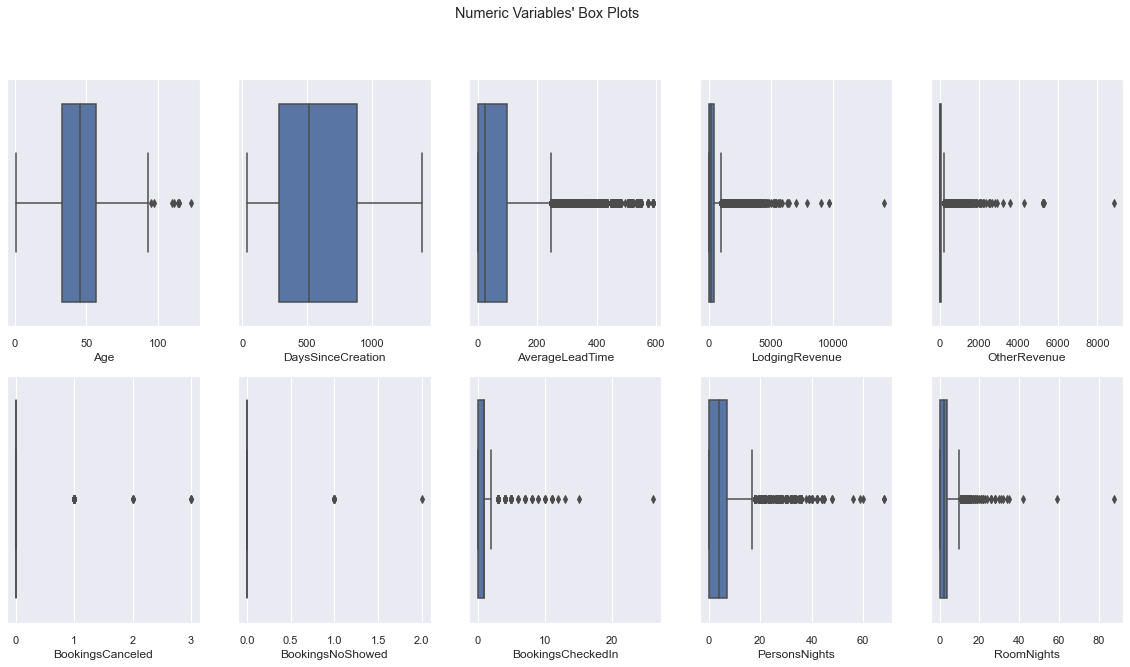

In [46]:
# All Categorical Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 10))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(),metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=ds[feat],ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

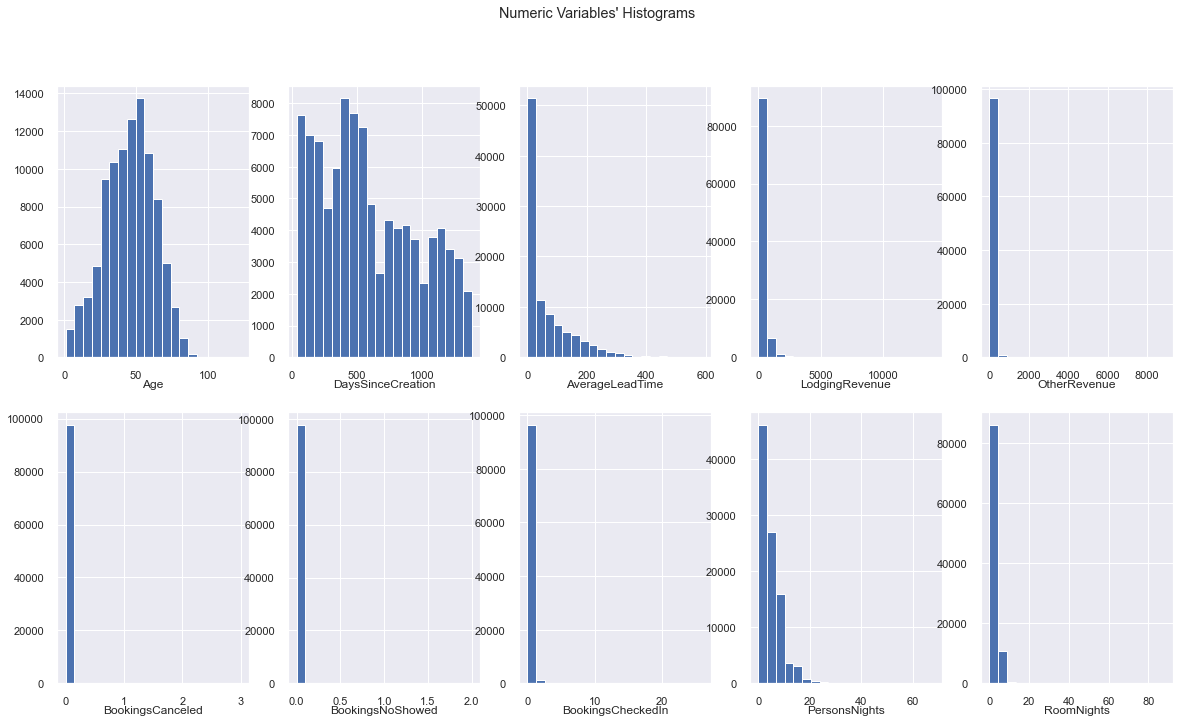

In [47]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11)) #defining the layout

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(ds[feat],bins=20)
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

#### 3.2.1 IQR

In [48]:
#IQR
q20 = ds.quantile(.20)
q80 = ds.quantile(.80)
iqr = (q80 - q20)

upper_lim = q80 + 1.5 * iqr
lower_lim = q20 - 1.5 * iqr

filters1 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters1.append(ds[metric].between(llim, ulim, inclusive=True))

filters1 = pd.Series(np.all(filters1, 0),index=ds[metric_features].index)
ds2 = ds[filters1]
print('Percentage of data kept after removing outliers:', np.round(ds2.shape[0]  / ds.shape[0], 4))

#takes to much data

Percentage of data kept after removing outliers: 0.9236


C:\Users\classroom\AppData\Local\Temp\ipykernel_3460\1005089340.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  filters1.append(ds[metric].between(llim, ulim, inclusive=True))


#### 3.2.2 Manual Removal

In [49]:
#Removing outliers manually
filters2 = (
    (ds['Age'] <= 100)
    &
    (ds['AverageLeadTime'] <= 570)
    &
    (ds['LodgingRevenue'] <= 7500)
    &
    (ds['OtherRevenue'] <= 4000)
    &
    (ds['BookingsCheckedIn'] <= 15)
    &
    (ds['PersonsNights'] <= 50)
    &
    (ds['RoomNights'] <= 40)
)

ds3 = ds[filters2]

print('Percentage of data kept after removing outliers:', np.round(ds3.shape[0] / ds.shape[0], 4))

Percentage of data kept after removing outliers: 0.9994


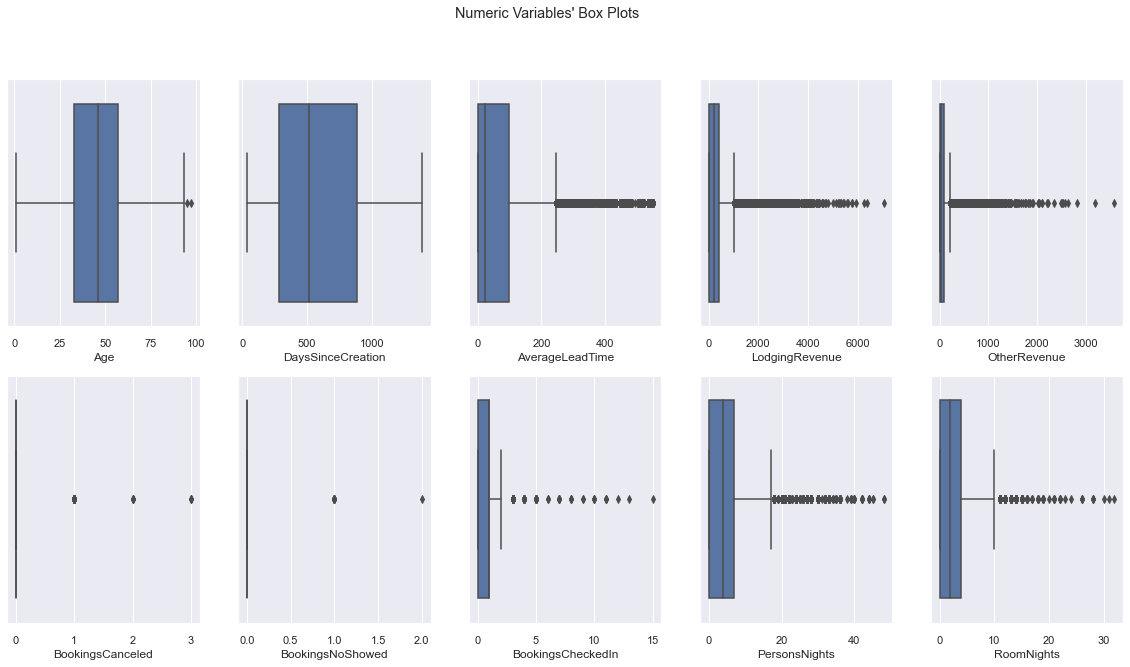

In [50]:
# All Categorical Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 10))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(),metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=ds3[feat],ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [51]:
ds3.reset_index(drop=False,inplace=True)
ds3.rename(columns = {0:'ID'}, inplace =True)
ds3

C:\Users\classroom\AppData\Local\Temp\ipykernel_3460\274879700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds3.rename(columns = {0:'ID'}, inplace =True)


,index,Nationality,Age,DaysSinceCreation,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,...,SRNoAlcoholInMiniBar,SRQuietRoom,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
0,0,PRT,52.0,440,Corporate,Corporate,0,0,0,0,...,0,0,59.0,292.00,82.3,1.0,0.0,2.0,6.0,4.0
1,2,DEU,32.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,3,FRA,61.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,...,0,0,93.0,240.00,60.0,0.0,0.0,1.0,10.0,5.0
3,4,FRA,52.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,JPN,55.0,1385,Travel Agent/Operator,Other,0,0,0,0,...,0,0,58.0,230.00,24.0,0.0,0.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97684,111617,DEU,31.0,36,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
97685,111618,BRA,43.0,36,Travel Agent/Operator,Other,0,0,0,0,...,0,0,170.0,755.25,20.0,0.0,0.0,1.0,10.0,5.0
97686,111619,BRA,37.0,36,Travel Agent/Operator,Other,0,0,0,0,...,0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
97687,111620,DEU,48.0,36,Travel Agent/Operator,Other,0,0,0,0,...,0,0,66.0,708.00,185.0,0.0,0.0,1.0,8.0,4.0


### 3.3 Feature Engeneering<a class="anchor" id="featureengeneering"></a>

#### Region Variable from the Nationality <a class="anchor" id="newvariables"></a>

In [52]:
#For grouping the nationalities we used a csv file that represents the countries based on the ISO-3166 format
#Adding continent, for this part please use the csv file that attached or you can download it from url blow:
#https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
#https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes

ISO_region = pd.read_csv('Case 1 submission - Supporting files.csv')

ISO_region.drop(['name', 'alpha-2', 'country-code', 'iso_3166-2',
                 'intermediate-region', 'region-code', 
                 'sub-region-code', 'intermediate-region-code'], axis=1, inplace=True)

ISO_region.rename(columns={"alpha-3": "Nationality"}, inplace=True)
ISO_region.rename(columns={"region": "Region"}, inplace=True)
ISO_region.head()

,Nationality,Region,sub-region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


In [53]:
# Merge the 'sub-region' column to the 'data'
ds3 = pd.merge(ds3, ISO_region[['Nationality','Region','sub-region']], on='Nationality')
ds3.head(5)

,index,Nationality,Age,DaysSinceCreation,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,...,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,Region,sub-region
0,0,PRT,52.0,440,Corporate,Corporate,0,0,0,0,...,59.0,292.0,82.3,1.0,0.0,2.0,6.0,4.0,Europe,Southern Europe
1,31,PRT,72.0,1385,Direct,Direct,0,0,0,0,...,85.0,180.6,54.0,0.0,0.0,1.0,6.0,3.0,Europe,Southern Europe
2,33,PRT,44.0,1385,Direct,Direct,0,0,0,0,...,78.0,180.6,100.5,0.0,0.0,1.0,6.0,3.0,Europe,Southern Europe
3,34,PRT,4.0,1385,Direct,Direct,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,Southern Europe
4,54,PRT,39.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,...,98.0,142.8,15.3,0.0,0.0,1.0,3.0,3.0,Europe,Southern Europe


In [54]:
#replace missing values (csv doesn't contain Antartica's ISO code)

ds3.loc[ds3["Region"].isna(), "Region"] = "Antarctica"
ds3.loc[ds3["sub-region"].isna(), "sub-region"] = "Antarctica"

In [55]:
ds3["sub-region"].unique()

array(['Southern Europe', 'Western Europe', 'Eastern Asia',
       'Northern Europe', 'Eastern Europe', 'Northern America',
       'Latin America and the Caribbean', 'Sub-Saharan Africa',
       'Australia and New Zealand', 'Western Asia', 'Northern Africa',
       'South-eastern Asia', 'Southern Asia', 'Central Asia',
       'Antarctica', 'Melanesia', 'Micronesia', 'Polynesia'], dtype=object)

#### Age_Bins Variable from the Age <a class="anchor" id="newvariables"></a>

In [56]:
#Bin the age
ds3['AgeBins'] = pd.cut(x=ds3['Age'], bins=[0, 19, 29, 39, 49, 59, 99], labels=['<20','20-29','30-39','40-49','50-59','>=60'])

In [57]:
ds3.AgeBins.value_counts()

50-59    21371
>=60     20483
40-49    20098
30-39    17632
20-29    10668
<20       7437
Name: AgeBins, dtype: int64

#### Total Revenue Variable from Sum ( Loading Revenue + Other Revenue ) <a class="anchor" id="newvariables"></a>

In [58]:
ds3['TotalRevenue'] = ds3['LodgingRevenue'] + ds3['OtherRevenue']

#### Adding new variables to the metric and non metric lists

In [59]:
# New features to add
new_metric_features = ['TotalRevenue']
new_non_metric_features = ['Region', 'sub-region','AgeBins']

# Append the new features to the existing feature lists
metric_features += new_metric_features
non_metric_features += new_non_metric_features

In [60]:
#Final adjustments
ds3.set_index('index', inplace=True)
ds3 = ds3.sort_index(ascending=True)
ds3 = ds3.rename_axis('ID')
ds3

,Nationality,Age,DaysSinceCreation,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,...,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,Region,sub-region,AgeBins,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,
0,PRT,52.0,440,Corporate,Corporate,0,0,0,0,0,...,82.3,1.0,0.0,2.0,6.0,4.0,Europe,Southern Europe,50-59,374.30
2,DEU,32.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Europe,Western Europe,30-39,0.00
3,FRA,61.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,60.0,0.0,0.0,1.0,10.0,5.0,Europe,Western Europe,>=60,300.00
4,FRA,52.0,1385,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Europe,Western Europe,50-59,0.00
5,JPN,55.0,1385,Travel Agent/Operator,Other,0,0,0,0,0,...,24.0,0.0,0.0,1.0,4.0,2.0,Asia,Eastern Asia,50-59,254.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111617,DEU,31.0,36,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Europe,Western Europe,30-39,0.00
111618,BRA,43.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,20.0,0.0,0.0,1.0,10.0,5.0,Americas,Latin America and the Caribbean,40-49,775.25
111619,BRA,37.0,36,Travel Agent/Operator,Other,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Americas,Latin America and the Caribbean,30-39,0.00


In [61]:
ds_new=ds3.copy()

### 3.4 Feature selection/elimination <a class="anchor" id="featureselection"></a>

#### Metric Variables

<AxesSubplot:>

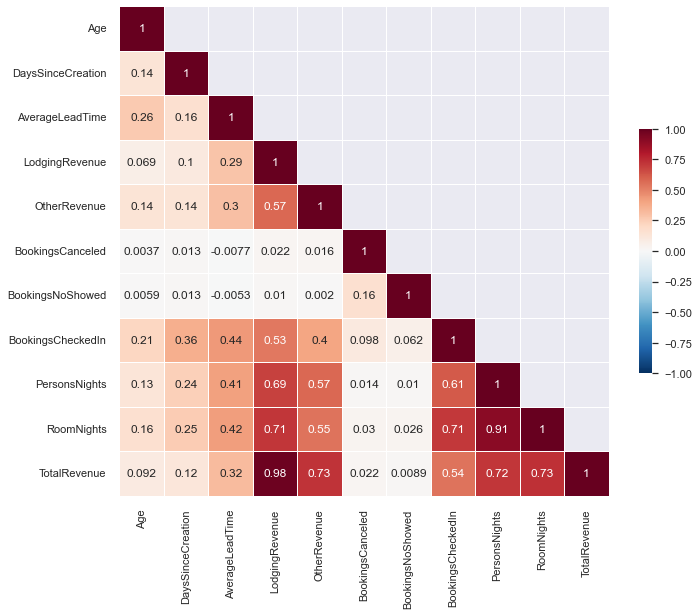

In [62]:
# Compute the correlation matrix - Pearson
corr = ds_new[metric_features].corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.diag_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu_r', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [63]:
#Insights from heatmap above:
#Since we created the variable total revenue, there is no point in keeping lodging Revenue and Other revenue in the model, as they give us the same information

In [64]:
ds_new.drop(['LodgingRevenue','OtherRevenue'], axis=1, inplace=True)

In [65]:
# Droping Lodging revenue and Other revenue from metric features
to_remove = ['LodgingRevenue','OtherRevenue']
for feature in to_remove:
    metric_features.remove(feature)
    
print(metric_features)

['Age', 'DaysSinceCreation', 'AverageLeadTime', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'TotalRevenue']


#### Categorical Variables

In [66]:
ds_new.drop(['MarketSegment','sub-region'], axis=1, inplace=True)

In [67]:
# DropingMarket Segment and sub-region from metric features
to_remove = ['MarketSegment','sub-region']
for feature in to_remove:
    non_metric_features.remove(feature)
    
print(non_metric_features)

['Nationality', 'DistributionChannel', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Region', 'AgeBins']


#### Final dataset before normalization

In [68]:
#Reorganizing the dataset
ds_new = ds_new.reindex(columns = ['Nationality','Region','Age','AgeBins','TotalRevenue','DaysSinceCreation', 'AverageLeadTime', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights','DistributionChannel', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'])

In [69]:
ds_new

,Nationality,Region,Age,AgeBins,TotalRevenue,DaysSinceCreation,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
0,PRT,Europe,52.0,50-59,374.30,440,59.0,1.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,DEU,Europe,32.0,30-39,0.00,1385,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,Europe,61.0,>=60,300.00,1385,93.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,Europe,52.0,50-59,0.00,1385,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,JPN,Asia,55.0,50-59,254.00,1385,58.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111617,DEU,Europe,31.0,30-39,0.00,36,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
111618,BRA,Americas,43.0,40-49,775.25,36,170.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
111619,BRA,Americas,37.0,30-39,0.00,36,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [70]:
#ds_new.to_csv('output3.csv', index=True)

## 4. Data visualization <a class="anchor" id="Datavisualization"></a>

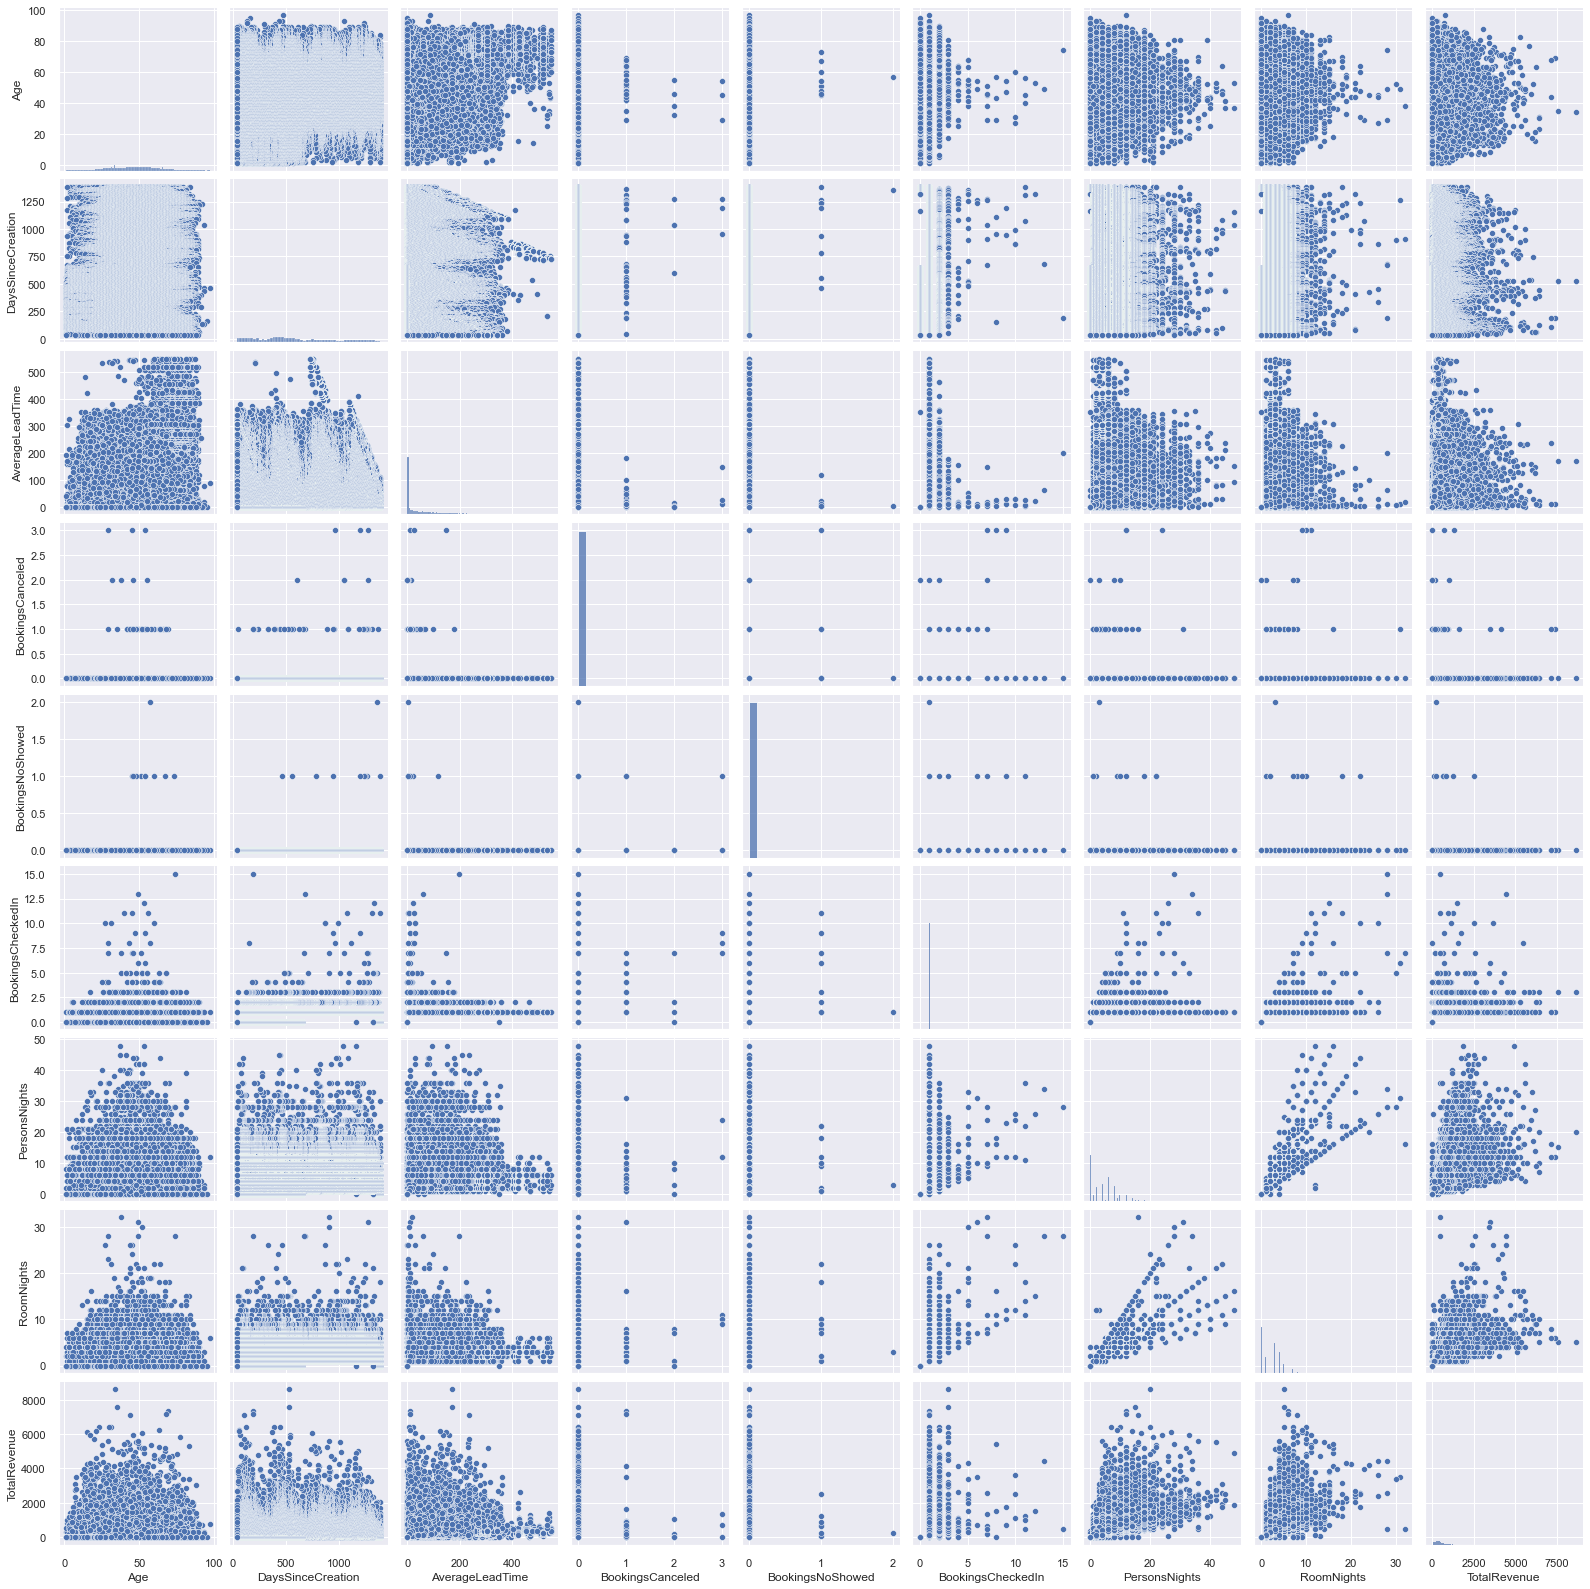

In [71]:
sns.pairplot(ds_new[metric_features])

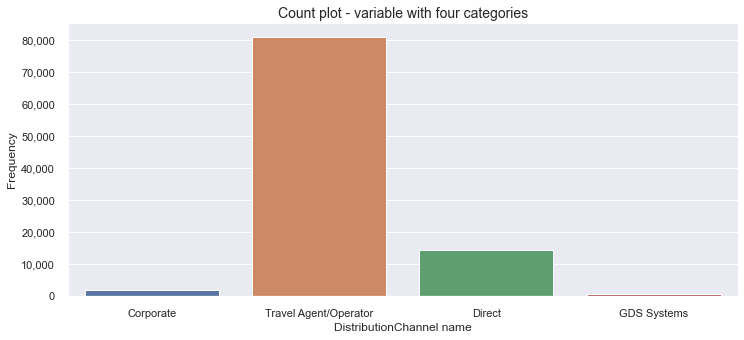

In [72]:
# COUNT PLOT

# Draw
fig, ax = plt.subplots(figsize=(12,5))
g = sns.countplot(data=ds_new, x=ds_new['DistributionChannel'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Count plot - variable with four categories", fontsize=plots_Title_fontSize)
plt.xlabel("DistributionChannel name")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'CountPlot.svg', bbox_inches="tight")

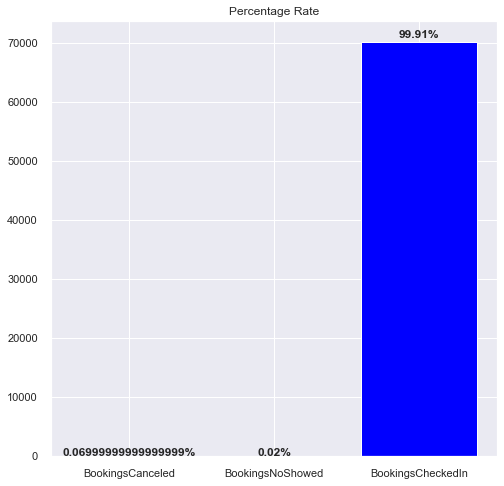

In [73]:
#Checking the cancelation and bookings
BookingsCanceled=ds_new['BookingsCanceled'].sum()
BookingsNoShowed=ds_new['BookingsNoShowed'].sum()
BookingsCheckedIn=ds_new['BookingsCheckedIn'].sum()
Total_Bookings=ds_new[['BookingsCanceled','BookingsNoShowed','BookingsCheckedIn']].sum(axis=1)
TB=Total_Bookings.sum()


y=[BookingsCanceled,BookingsNoShowed,BookingsCheckedIn]
x=['BookingsCanceled','BookingsNoShowed','BookingsCheckedIn']
per=[round(BookingsCanceled/TB,4)*100,round(BookingsNoShowed/TB,4)*100,round(BookingsCheckedIn/TB,4)*100]

plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(x,y, color = colors_list)
plt.title('Percentage Rate')
  
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(per[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()


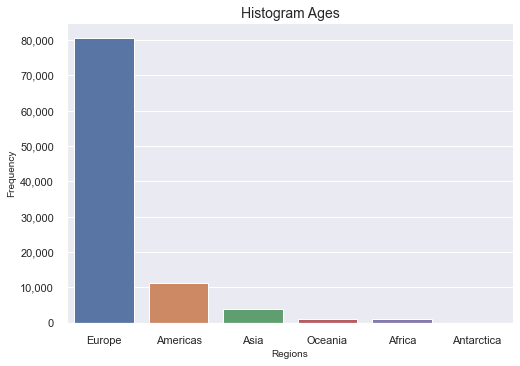

In [74]:
# The Bar chart of top 10 Nationalities in the dataset

fig, ax = plt.subplots()
g = sns.countplot(data=ds, x=ds_new['Region'],order=pd.value_counts(ds_new['Region']).iloc[:10].index)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Histogram Ages", fontsize=plots_Title_fontSize)
plt.xlabel("Regions")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

In [72]:
# Calculating the bookings based on the region
pivot_data = ds_new[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'AgeBins']]

table = pd.pivot_table(pivot_data, index=['AgeBins'], aggfunc=np.sum)
table

,BookingsCanceled,BookingsCheckedIn,BookingsNoShowed
AgeBins,,,
<20,0.0,1458.0,0.0
20-29,4.0,7021.0,0.0
30-39,5.0,13458.0,0.0
40-49,20.0,15771.0,3.0
50-59,12.0,16600.0,5.0
>=60,9.0,15867.0,3.0


<AxesSubplot:xlabel='AgeBins'>

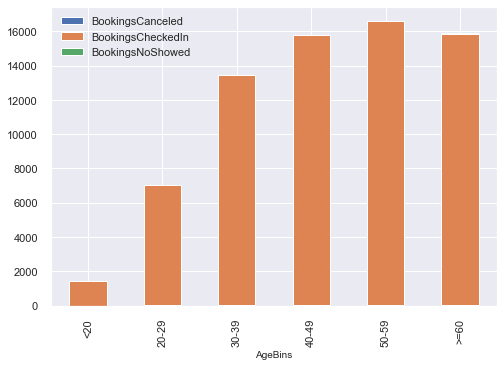

In [73]:
#The bar chart of booking status based on the age group
table.plot(kind='bar', stacked=True)


In [74]:
# Calculating the bookings by Region
pivot_data = ds_new[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'Region']]
table_2 = pd.melt(pivot_data[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'Region']], 
                  id_vars=['Region'],
                  value_vars=['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn'],
                  var_name='Booking status', value_name='Count')
table_2 = pd.pivot_table(table_2, index=['Booking status'], columns=['Region'], 
                         values='Count', aggfunc=np.sum, fill_value=0)
table_2

Region,Africa,Americas,Antarctica,Asia,Europe,Oceania
Booking status,,,,,,
BookingsCanceled,2,4,0,0,44,0
BookingsCheckedIn,670,7437,2,2815,58485,766
BookingsNoShowed,0,0,0,0,11,0


<AxesSubplot:xlabel='Booking status'>

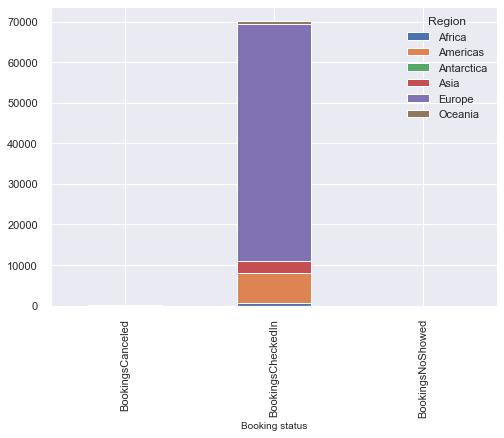

In [75]:
#The booking status shown in the bar chart

table_2.plot(kind='bar', stacked=True)


In [76]:
# Calculating the bookings by Distribution Channel

pivot_data = ds_new[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'DistributionChannel']]
table_3 = pd.melt(pivot_data[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'DistributionChannel']], 
                  id_vars=['DistributionChannel'],
                  value_vars=['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn'],
                  var_name='Booking status', value_name='Count')
table_3 = pd.pivot_table(table_3, index=['Booking status'], columns=['DistributionChannel'], 
                         values='Count', aggfunc=np.sum, fill_value=0)
table_3

DistributionChannel,Corporate,Direct,GDS Systems,Travel Agent/Operator
Booking status,,,,
BookingsCanceled,21,20,0,9
BookingsCheckedIn,1893,9467,507,58308
BookingsNoShowed,7,3,0,1


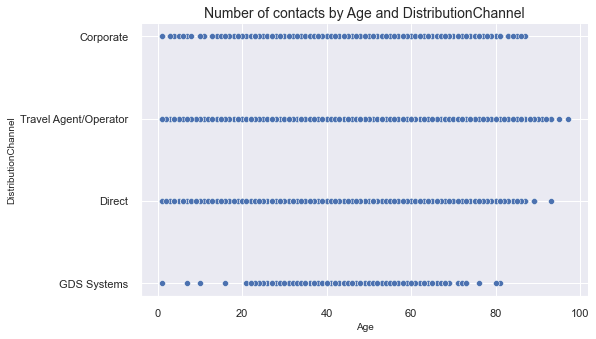

In [77]:
# SCATTER PLOT

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.scatterplot(data=ds_new, x="Age", y="DistributionChannel")

# Decoration
sns.despine()
plt.title("Number of contacts by Age and DistributionChannel", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("DistributionChannel")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'ScatterPlot.jpg', dpi=300, bbox_inches="tight")

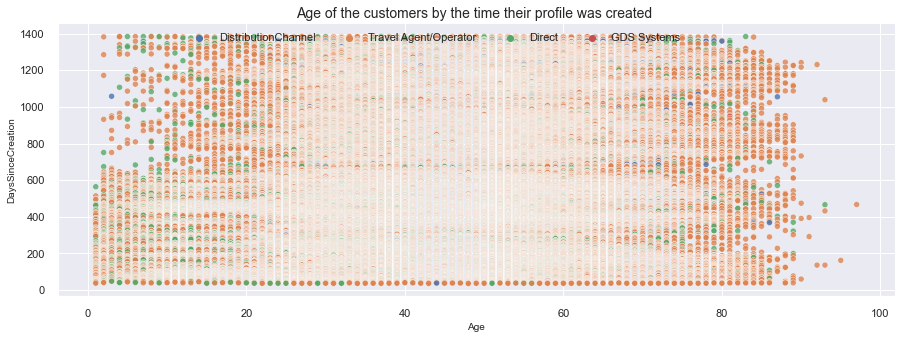

In [78]:
# SCATTER PLOT - BY ONE CATEGORICAL

# Draw
fig, ax = plt.subplots(figsize=(15,5))
g = sns.scatterplot(data=ds_new, x="Age", y="DaysSinceCreation", hue="DistributionChannel", alpha=0.8, legend='brief')

# Decoration
sns.despine()
plt.title("Age of the customers by the time their profile was created ", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("DaysSinceCreation")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels[0]='DistributionChannel'
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=5, bbox_to_anchor=(0.45, 1.003), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'ScatterPlotByOneCategory.jpg', dpi=300, bbox_inches="tight")

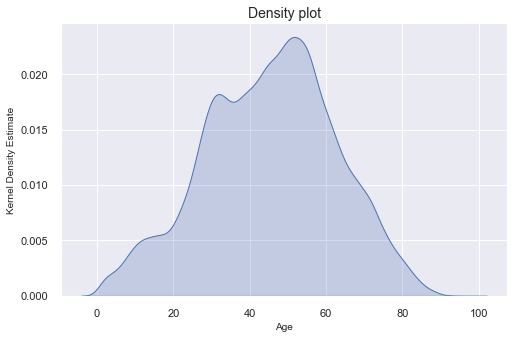

In [79]:
# DENSITY PLOT (Kernel Density Estimate)

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.kdeplot(ds_new['Age'], shade=True, legend=False)

# Decoration
sns.despine()
plt.title("Density plot", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("Kernel Density Estimate")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'DensityPlot.svg', bbox_inches="tight")

C:\Users\david\anaconda3\lib\site-packages\joypy\joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


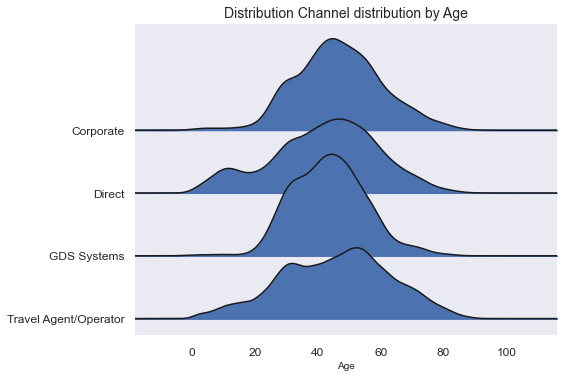

In [80]:
# JOY PLOT - ONE VARIABLE

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = joypy.joyplot(data=ds_new, column='Age', by='DistributionChannel', ax=ax)

# Decoration
plt.title("Distribution Channel distribution by Age", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'JoyPlotOneVar.svg', bbox_inches="tight")

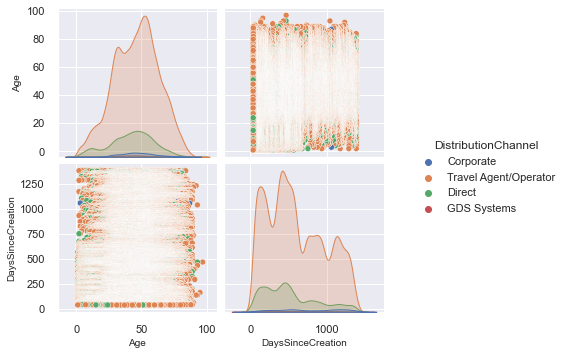

In [81]:
# PAIR PLOT

# Draw
cols = ['Age','DaysSinceCreation','DistributionChannel']
g = sns.pairplot(ds_new[cols], hue='DistributionChannel')
g.fig.set_size_inches(8,5)

# Save to file
#g.savefig(fname=exportsFolder+'PairPlot.jpg', dpi=300, bbox_inches="tight")

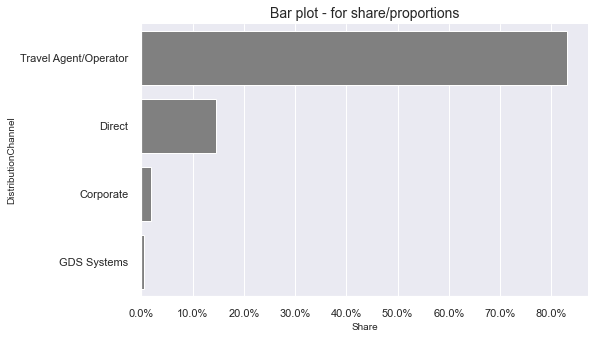

In [82]:
# BAR PLOT - FOR SHARE (Alternative to Pie chart)

# Aggregate and sort
tempDF2 = pd.DataFrame(data=ds_new['DistributionChannel'].value_counts(normalize=True)).reset_index()

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.barplot(data=tempDF2, y='index', x='DistributionChannel', color='grey')

# Decoration
vals = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(ticker.FixedLocator(vals))
ax.set_xticklabels(['{:,.1%}'.format(x) for x in vals])
sns.despine()
plt.title("Bar plot - for share/proportions", fontsize=plots_Title_fontSize)
plt.xlabel("Share")
plt.ylabel("DistributionChannel")
plt.rc('axes', labelsize=subPlots_label_fontSize);

# Save to file
#fig.savefig(fname=exportsFolder+'BarPlotForShare.svg', bbox_inches="tight")

In [83]:
ds_new = ds_new.drop(columns=['BookingsNoShowed',"BookingsCanceled"])
metric_features.remove("BookingsNoShowed")
metric_features.remove("BookingsCanceled")

## 5.  Data Normalization and Encoding<a class="anchor" id="normalization&encoding"></a>

### 5.1 Normalization <a class="anchor" id="normalization"></a>

In [84]:
ds_for_normalization = ds_new.copy()

In [85]:
# Reset index for ds_for_normalization
ds_for_normalization = ds_for_normalization.reset_index(drop=True)

In [86]:
ds_for_normalization.drop(['Age'], axis=1, inplace=True)

In [87]:
#Droping Age from metric features
to_remove = ['Age']
for feature in to_remove:
    metric_features.remove(feature)
    
print(metric_features)

['DaysSinceCreation', 'AverageLeadTime', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'TotalRevenue']


In [88]:
ds_for_normalization.drop(['Nationality'], axis=1, inplace=True)

In [89]:
#Droping Nationality from non metric features
to_remove = ['Nationality']
for feature in to_remove:
    non_metric_features.remove(feature)
    
print(non_metric_features)

['DistributionChannel', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Region', 'AgeBins']


In [90]:
#StandardScaler: This scaler scales the data to have zero mean and unit variance. 
#It transforms the data to have a mean of zero and a standard deviation of 1, 
#which is useful when the data has an unknown distribution or when the feature has outliers.

In [91]:
ds_for_normalization[metric_features]

,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,PersonsNights,RoomNights,TotalRevenue
0,440,59.0,2.0,6.0,4.0,374.30
1,1385,0.0,0.0,0.0,0.0,0.00
2,1385,93.0,1.0,10.0,5.0,300.00
3,1385,0.0,0.0,0.0,0.0,0.00
4,1385,58.0,1.0,4.0,2.0,254.00
...,...,...,...,...,...,...
97683,36,0.0,0.0,0.0,0.0,0.00
97684,36,170.0,1.0,10.0,5.0,775.25
97685,36,0.0,0.0,0.0,0.0,0.00
97686,36,66.0,1.0,8.0,4.0,893.00


In [92]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the feature data
scaler.fit(ds_for_normalization[metric_features])

# Transform the feature data to have zero mean and unit variance
X_scaled = scaler.transform(ds_for_normalization[metric_features])

# Convert the scaled feature data back to a DataFrame
ds_normalized_metric = pd.DataFrame(X_scaled, columns=metric_features,index=ds_for_normalization.index)

ds_normalized_metric

,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,PersonsNights,RoomNights,TotalRevenue
0,-0.401617,-0.036493,2.540081,0.328591,0.850448,0.041517
1,2.134027,-0.736465,-1.423712,-0.970699,-1.082376,-0.817799
2,2.134027,0.366881,0.558184,1.194784,1.333654,-0.129060
3,2.134027,-0.736465,-1.423712,-0.970699,-1.082376,-0.817799
4,2.134027,-0.048357,0.558184,-0.104506,-0.115964,-0.234667
...,...,...,...,...,...,...
97683,-1.485638,-0.736465,-1.423712,-0.970699,-1.082376,-0.817799
97684,-1.485638,1.280404,0.558184,1.194784,1.333654,0.962016
97685,-1.485638,-0.736465,-1.423712,-0.970699,-1.082376,-0.817799
97686,-1.485638,0.046554,0.558184,0.761688,0.850448,1.232346


### 5.2 Encoding<a class="anchor" id="encoding"></a>

In [93]:
ds_for_normalization[non_metric_features]

,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Region,AgeBins
0,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,Europe,50-59
1,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Europe,30-39
2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Europe,>=60
3,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Europe,50-59
4,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Asia,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97683,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,Europe,30-39
97684,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,Americas,40-49
97685,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,Americas,30-39
97686,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Europe,40-49


In [94]:
# Create OneHotEncoder object and fit on selected columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(ds_for_normalization[non_metric_features])

# Transform categorical columns using the encoder
encoded_cols = encoder.transform(ds_for_normalization[non_metric_features]).toarray()

# Create new dataframe with encoded columns
encoded_ds = pd.concat([ds_for_normalization[non_metric_features].drop(ds_for_normalization[non_metric_features].columns, axis=1), pd.DataFrame(encoded_cols)], axis=1)

# Rename columns with encoded categories
new_cols = encoder.get_feature_names_out (ds_for_normalization[non_metric_features].columns)
encoded_ds.columns = list(ds_for_normalization[non_metric_features].columns.drop(ds_for_normalization[non_metric_features].columns)) + list(new_cols)

# Print encoded dataframe
encoded_ds

,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS Systems,DistributionChannel_Travel Agent/Operator,SRHighFloor_0,SRHighFloor_1,SRLowFloor_0,SRLowFloor_1,SRAccessibleRoom_0,SRAccessibleRoom_1,...,Region_Antarctica,Region_Asia,Region_Europe,Region_Oceania,AgeBins_20-29,AgeBins_30-39,AgeBins_40-49,AgeBins_50-59,AgeBins_<20,AgeBins_>=60
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97683,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97684,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97685,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97686,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 5.3 Merging <a class="anchor" id="merging"></a>

In [95]:
#Name the index
encoded_ds = encoded_ds.rename_axis('ID')
ds_normalized_metric = ds_normalized_metric.rename_axis('ID')

In [96]:
ds_normalized=pd.concat([ds_normalized_metric, encoded_ds],axis=1,sort=False)
ds_normalized

,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,PersonsNights,RoomNights,TotalRevenue,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS Systems,DistributionChannel_Travel Agent/Operator,...,Region_Antarctica,Region_Asia,Region_Europe,Region_Oceania,AgeBins_20-29,AgeBins_30-39,AgeBins_40-49,AgeBins_50-59,AgeBins_<20,AgeBins_>=60
ID,,,,,,,,,,,,,,,,,,,,,
0,-0.401617,-0.036493,2.540081,0.328591,0.850448,0.041517,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.134027,-0.736465,-1.423712,-0.970699,-1.082376,-0.817799,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.134027,0.366881,0.558184,1.194784,1.333654,-0.129060,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.134027,-0.736465,-1.423712,-0.970699,-1.082376,-0.817799,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.134027,-0.048357,0.558184,-0.104506,-0.115964,-0.234667,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97683,-1.485638,-0.736465,-1.423712,-0.970699,-1.082376,-0.817799,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97684,-1.485638,1.280404,0.558184,1.194784,1.333654,0.962016,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97685,-1.485638,-0.736465,-1.423712,-0.970699,-1.082376,-0.817799,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 6.  PCA - Principal Component Analysis <a class="anchor" id="pca"></a>

In [97]:
# Fit the PCA algorithm to data 
pca = PCA().fit(ds_normalized)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pca_ds = pd.DataFrame({'Component': range(1, len(ds_normalized.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pca_ds

,Component,Variance explained,Cumulative variance explained
0,1,0.413899,0.413899
1,2,0.115084,0.528983
2,3,0.091702,0.620685
3,4,0.062051,0.682736
4,5,0.047993,0.730729
5,6,0.037259,0.767988
6,7,0.032058,0.800046
7,8,0.028062,0.828108
8,9,0.025140,0.853248
9,10,0.022784,0.876032


(97688, 2)


C:\Users\david\AppData\Local\Temp\ipykernel_26588\4131028911.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


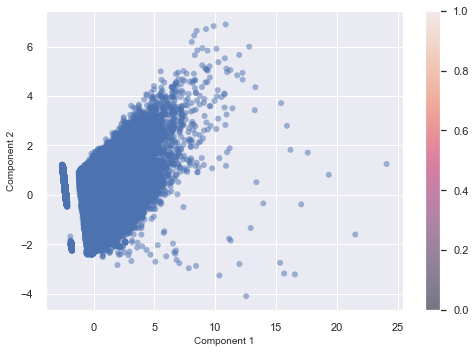

In [98]:
# Let's use PCA to visualization
pca2 = PCA(n_components = 2)
pca2.fit(ds_normalized)
X_pca2 = pca2.transform(ds_normalized)
print(X_pca2.shape)

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

Text(0.5, 1.0, 'Explained variance by components')

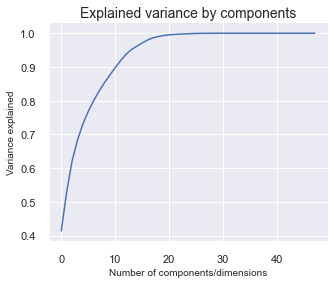

In [99]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.title('Explained variance by components', fontsize=plots_Title_fontSize)

In [100]:
############### DEFINE PARAMS
top_k = 20
#select data based on percentile (top_q) or top-k features
top_q = .50
top_pc = 20
###############

# PCA factor loadings
selected_features = ds_normalized.columns
df_c = pd.DataFrame(pca.components_, columns=selected_features).T

print("Factor Loadings for the 1. component \n(explains {0:.2f} of the variance)".format(pca_ds.iloc[0,0]))
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values()[:top_k])

Factor Loadings for the 1. component 
(explains 1.00 of the variance)

Top 20 highest
----------------------------------------
RoomNights                                   0.500032
PersonsNights                                0.483731
BookingsCheckedIn                            0.438045
TotalRevenue                                 0.430372
AverageLeadTime                              0.309274
DaysSinceCreation                            0.201697
AgeBins_50-59                                0.016916
AgeBins_>=60                                 0.016003
Region_Europe                                0.012674
AgeBins_40-49                                0.010296
DistributionChannel_Travel Agent/Operator    0.010152
SRCrib_0                                     0.003674
SRQuietRoom_1                                0.003197
SRTwinBed_0                                  0.002856
SRKingSizeBed_0                              0.001280
DistributionChannel_Corporate                0.001196
SRHighFlo

## 7. Clustering <a class="anchor" id="clustering"></a>

In [101]:
# Apply the dimension reduction to the dataset (for 20 components)
pca_reduced = PCA(n_components = 20)
pca_reduced.fit(ds_normalized)
X_pca_reduced = pca_reduced.transform(ds_normalized) 
print(X_pca_reduced.shape)

(97688, 20)


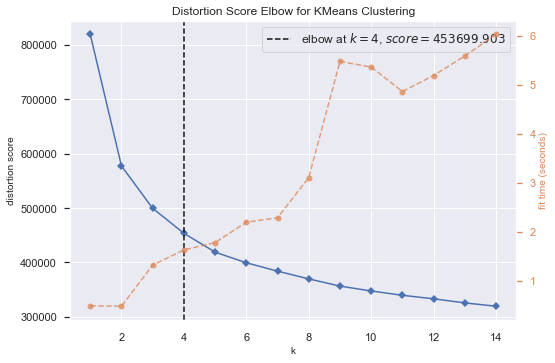

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,15), random_state=123)
visualizer.fit(X_pca_reduced)
visualizer.show() 

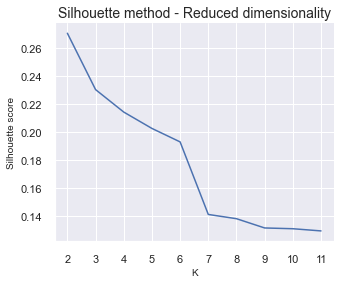

In [103]:
# Select K based on the Silhouette method
# ATTENTION! Depending on the computer this can take long time to run (more than 10 minutes)
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 12):
  km = KMeans(n_clusters = k, random_state=123).fit(ds_normalized)
  labels = km.labels_
  sil.append(silhouette_score(ds_normalized, labels, metric = 'euclidean'))


# Show Results
# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(range(2, 12), sil, 'bx-')
# Decoration
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title('Silhouette method - Reduced dimensionality', fontsize=plots_Title_fontSize);

The Elbow method indicates K should be 4, but the Silhouette method points to 7. However, since we will choose 7 in the hope of it allowing for more marketing strategies.

In [104]:
# Apply the K-Means for K=7
K=7
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

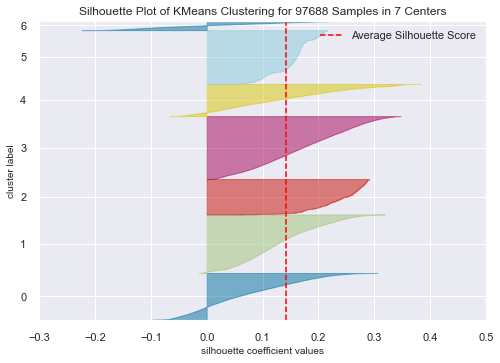

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 97688 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [105]:
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca_reduced)
visualizer.show()

In [106]:
plots_barTexts_fontSize = 8

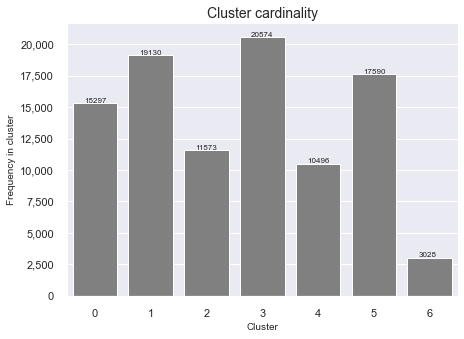

In [107]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = ds_for_normalization.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

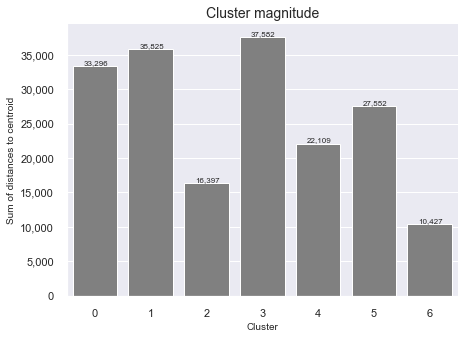

In [108]:
# Plot clusters magnitude

# Compute Magnitude
ds_normalized['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = ds_normalized['distanceToCentroid'].groupby(y_kmeans).sum()
ds_normalized = ds_normalized.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

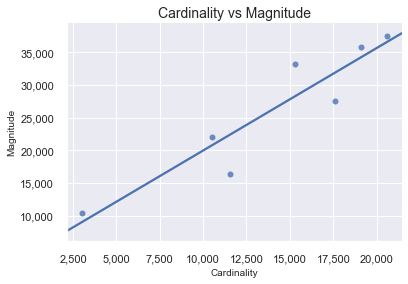

In [109]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Cardinality is correlated to magnitude, therefore no major anomalies seems to exist in clusters.

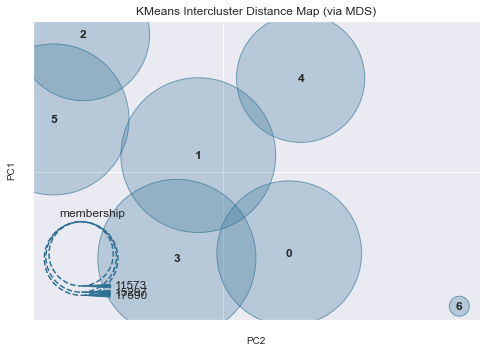

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [110]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca_reduced)
visualizer.show()

In [111]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=ds_normalized.columns)
wheightsDF

,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,PersonsNights,RoomNights,TotalRevenue,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS Systems,DistributionChannel_Travel Agent/Operator,...,Region_Antarctica,Region_Asia,Region_Europe,Region_Oceania,AgeBins_20-29,AgeBins_30-39,AgeBins_40-49,AgeBins_50-59,AgeBins_<20,AgeBins_>=60
0,2.016973e-01,3.092745e-01,4.380448e-01,4.837314e-01,5.000320e-01,4.303725e-01,0.001196,-0.010955,-0.000394,0.010152,...,-0.000014,-0.002225,0.012674,-0.000104,-0.006985,-0.000560,0.010296,0.016916,-0.035670,0.016003
1,-8.927965e-01,-8.626738e-02,-1.807273e-01,1.689385e-01,1.386706e-01,3.210831e-01,-0.010127,0.030348,-0.000337,-0.019884,...,-0.000021,-0.001326,-0.030862,0.002274,0.020066,-0.008689,-0.000904,-0.010926,0.031440,-0.030988
2,2.309021e-01,-9.036822e-01,-1.395433e-02,1.524724e-01,1.429576e-01,2.235518e-01,0.008869,0.045854,0.002511,-0.057234,...,0.000021,0.010616,-0.007056,-0.007309,0.016400,0.042525,0.039344,0.015934,0.004940,-0.119143
3,-3.924749e-02,-7.703390e-02,4.396988e-02,-3.332576e-02,-1.166936e-02,8.487267e-02,0.017535,0.112244,0.003689,-0.133467,...,-0.000018,0.002034,0.041672,-0.006686,0.006434,-0.013136,0.008541,-0.006175,0.006432,-0.002096
4,-2.986877e-01,-1.710172e-01,8.364208e-01,-2.545066e-01,-3.112424e-02,-2.662420e-01,0.028197,0.051796,0.010422,-0.090416,...,0.000012,0.013918,-0.048686,0.000617,-0.002211,0.075837,0.051962,-0.015068,-0.072971,-0.037548
5,1.059645e-01,9.943084e-02,1.009191e-01,-4.740510e-01,-3.685187e-01,7.451930e-01,0.016392,0.121036,0.004711,-0.142138,...,0.000026,0.008208,-0.027644,0.003006,-0.022011,-0.013025,0.035629,-0.026294,0.017566,0.008135
6,2.036234e-03,-1.372267e-01,1.312422e-01,-1.062972e-01,-4.241318e-02,1.178263e-01,-0.023257,-0.481531,-0.007478,0.512266,...,-0.000007,0.044760,-0.187881,0.009201,0.019841,0.008543,-0.128967,-0.074692,-0.028785,0.204060
7,5.217116e-02,-5.562362e-03,-6.419700e-02,7.750585e-02,4.788629e-02,-5.505305e-02,0.013887,0.237925,0.001627,-0.253439,...,0.000069,0.080501,-0.595830,0.027104,-0.033104,0.002259,-0.063477,-0.305519,0.011484,0.388357
8,-1.229806e-03,-5.124932e-03,1.425283e-02,-4.140315e-02,2.171795e-02,6.192274e-03,0.004978,0.043721,0.000269,-0.048968,...,0.000027,0.022981,-0.192053,0.008948,-0.032928,-0.088506,-0.592994,0.750461,-0.006647,-0.029386
9,1.331131e-02,2.387416e-02,1.884534e-02,6.946290e-02,-7.938737e-02,-3.574959e-02,0.003664,-0.011691,0.000353,0.007674,...,0.000014,0.043420,-0.261143,0.003676,-0.061612,-0.555463,0.605601,0.299559,-0.017207,-0.270878


In [112]:
# Study the weights of component 20
comp = abs(wheightsDF.iloc[19])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

DistributionChannel_Corporate                0.778854
DistributionChannel_Direct                   0.466191
DistributionChannel_Travel Agent/Operator    0.396607
DistributionChannel_GDS Systems              0.083944
PersonsNights                                0.072754
RoomNights                                   0.060685
BookingsCheckedIn                            0.018596
Region_Europe                                0.016425
Region_Africa                                0.015596
SRCrib_0                                     0.015432
SRCrib_1                                     0.015432
AgeBins_40-49                                0.014975
Region_Oceania                               0.014068
SRHighFloor_1                                0.010731
SRHighFloor_0                                0.010731
AverageLeadTime                              0.009829
SRKingSizeBed_0                              0.009822
SRKingSizeBed_1                              0.009822
Region_Asia                 


## 8. Conclusion <a class="anchor" id="conclusion"></a>

In [113]:
comp.index

Index(['DistributionChannel_Corporate', 'DistributionChannel_Direct',
       'DistributionChannel_Travel Agent/Operator',
       'DistributionChannel_GDS Systems', 'PersonsNights', 'RoomNights',
       'BookingsCheckedIn', 'Region_Europe', 'Region_Africa', 'SRCrib_0',
       'SRCrib_1', 'AgeBins_40-49', 'Region_Oceania', 'SRHighFloor_1',
       'SRHighFloor_0', 'AverageLeadTime', 'SRKingSizeBed_0',
       'SRKingSizeBed_1', 'Region_Asia', 'SRQuietRoom_1', 'SRQuietRoom_0',
       'AgeBins_<20', 'DaysSinceCreation', 'AgeBins_>=60', 'Region_Americas',
       'AgeBins_50-59', 'SRTwinBed_1', 'SRTwinBed_0', 'AgeBins_20-29',
       'SRBathtub_1', 'SRBathtub_0', 'AgeBins_30-39', 'SRShower_1',
       'SRShower_0', 'SRMediumFloor_1', 'SRMediumFloor_0',
       'SRAwayFromElevator_1', 'SRAwayFromElevator_0', 'SRLowFloor_1',
       'SRLowFloor_0', 'SRNearElevator_1', 'SRNearElevator_0', 'TotalRevenue',
       'SRAccessibleRoom_1', 'SRAccessibleRoom_0', 'SRNoAlcoholInMiniBar_1',
       'SRNoAlcoholI

In [114]:
top_features = ['DistributionChannel_Corporate', 'DistributionChannel_Direct',
       'DistributionChannel_Travel Agent/Operator',
       'DistributionChannel_GDS Systems', 'PersonsNights', 'RoomNights',
       'BookingsCheckedIn', 'Region_Europe', 'Region_Africa', 'SRCrib_0',
       'SRCrib_1', 'AgeBins_40-49', 'Region_Oceania', 'SRHighFloor_1',
       'SRHighFloor_0', 'AverageLeadTime', 'SRKingSizeBed_0',
       'SRKingSizeBed_1', 'Region_Asia', 'SRQuietRoom_1', 'SRQuietRoom_0',
       'AgeBins_<20', 'DaysSinceCreation', 'AgeBins_>=60', 'Region_Americas',
       'AgeBins_50-59', 'SRTwinBed_1', 'SRTwinBed_0', 'AgeBins_20-29',
       'SRBathtub_1', 'SRBathtub_0', 'AgeBins_30-39', 'SRShower_1',
       'SRShower_0', 'SRMediumFloor_1', 'SRMediumFloor_0',
       'SRAwayFromElevator_1', 'SRAwayFromElevator_0', 'SRLowFloor_1',
       'SRLowFloor_0', 'SRNearElevator_1', 'SRNearElevator_0', 'TotalRevenue',
       'SRAccessibleRoom_1', 'SRAccessibleRoom_0', 'SRNoAlcoholInMiniBar_1',
       'SRNoAlcoholInMiniBar_0', 'Region_Antarctica']

In [115]:
#Creating a merged dataset with encoded variables but non normalized metric variables to take a look at the mean values of the features
ds_new2=ds_new.copy()
ds_new2 = ds_new2.reset_index(drop=True)
ds_non_normalized_ohc = pd.concat([ds_new2[metric_features], encoded_ds],axis=1, sort=False)
ds_non_normalized_ohc

,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,PersonsNights,RoomNights,TotalRevenue,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS Systems,DistributionChannel_Travel Agent/Operator,...,Region_Antarctica,Region_Asia,Region_Europe,Region_Oceania,AgeBins_20-29,AgeBins_30-39,AgeBins_40-49,AgeBins_50-59,AgeBins_<20,AgeBins_>=60
0,440,59.0,2.0,6.0,4.0,374.30,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1385,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1385,93.0,1.0,10.0,5.0,300.00,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1385,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1385,58.0,1.0,4.0,2.0,254.00,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97683,36,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97684,36,170.0,1.0,10.0,5.0,775.25,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97685,36,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97686,36,66.0,1.0,8.0,4.0,893.00,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [116]:
# Check the mean values of each cluster for top 30 relevant features
top_features = comp[:50].index
clustersMeanDF = pd.DataFrame(ds_non_normalized_ohc[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3,4,5,6
DistributionChannel_Corporate,0.010917,0.030476,0.002765,0.033197,0.011814,0.010233,0.021136
DistributionChannel_Direct,0.129045,0.171929,0.104986,0.117284,0.065072,0.224673,0.239102
DistributionChannel_Travel Agent/Operator,0.858600,0.781129,0.891126,0.842957,0.922923,0.763616,0.735799
DistributionChannel_GDS Systems,0.001438,0.016466,0.001123,0.006562,0.000191,0.001478,0.003963
PersonsNights,10.336275,4.125719,0.000000,4.456061,5.777058,0.000000,16.031044
RoomNights,4.780741,2.381129,0.000000,2.354477,2.930640,0.000000,6.914465
BookingsCheckedIn,1.030137,1.019185,0.000000,1.010158,1.014768,0.000000,1.151255
Region_Europe,0.852978,0.805802,0.753305,0.840381,0.868331,0.823820,0.799538
Region_Africa,0.010917,0.010141,0.009678,0.009818,0.002954,0.010517,0.016843
SRCrib_0,0.984834,0.987925,0.959043,0.991786,0.994188,0.976350,0.982827


In [ ]:
# Check the mean values of each cluster for top 30 relevant features
top_features = comp[:50].index
clustersSumnDF = pd.DataFrame(ds_non_normalized_ohc[top_features].groupby(y_kmeans).sum(),columns=top_features)
clustersSumnDF.transpose()

In [ ]:
clustersSumnDF.transpose().to_excel("Clustertablevsum1.xlsx")

In [ ]:
clustersMeanDF.transpose().to_excel("Clustertablevsavg1.xlsx")

In [117]:
df_with_labels = pd.concat([ds_non_normalized_ohc, pd.Series(y_kmeans, name='cluster_labels')], axis=1)

In [118]:
# filter the rows with cluster_labels = 5
df_with_labels[df_with_labels['cluster_labels'] == 2].sort_values('SRKingSizeBed_1')


,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,PersonsNights,RoomNights,TotalRevenue,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS Systems,DistributionChannel_Travel Agent/Operator,...,Region_Asia,Region_Europe,Region_Oceania,AgeBins_20-29,AgeBins_30-39,AgeBins_40-49,AgeBins_50-59,AgeBins_<20,AgeBins_>=60,cluster_labels
7,1385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
78006,221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
78007,221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
78009,221,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
78011,221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57626,439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
57627,439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
57630,439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
57633,439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2



## 9. Results <a class="anchor" id="results"></a>

#### Some insights:

All customers are mainly from Europe and they use preferencial the Travel Agent/Operator Channel.

*Cluster 0 “MV” *: 
* Midle Value Customers , consists of customers that usually request a crib. They are relatively older ( >= 50 ), with an average age of over 50 years old. They tend to stay for an average of 6 person/nights and have stayed in the hotel for a total of 3 room/nights. These customers usually request a quiet room and a room with a shower, away from the elevator. They generate a significant amount of total revenue for the hotel. Interestingly, these customers have age of creation in the midle ( between the oldest and youngest ) and they are the most booking earliest bookers customers.

*Cluster 1  "NV” (A)" *: 
* No Value Customers, consists clients on the two sides of the ages lower than 20, and higher than 60,( childs and old age "Grand Fathers " ), their hotels charges are cover by a regular hotel customers , that why this group are the youngest customers on the Age of customers since creation . Because they don´t cover any expenses they don´t have any preference on the room facilities.

*Cluster 5  "VLV" *: 
* Very Low Value Customers, consists on customers between 30 and 59, they are the cluster with highest number of customers ( qtd ) , oldest Age since creation,  and one of the lowest average lead time, so it means that they book very earliest to the date, it means they are looking always for the lowest prices ( promotions ) , mostly no checked-in and usually ask for a crib, a room with a king-size bed, quiet room, bathtub, and no alcohol in the mini-bar, and prefer a high floor.

*Cluster 3  "HV" *: 
* High Value , in this Cluster Customers has the highest  Total revenue, between the age of 40-59 . They usually book the room directly. The number of adults and children in each booking, multiplied by the number of nights length-of-stay is 10. The room/nights the customer has stayed at the hotel so far is 4. They usually book the room many days before arrival date the customer makes bookings. In addition, they ask for quiet room. They are the smallest group and they are regular customer ( Middle age since creation ).

*Cluster 6 "VHV" *: 

* Very High Value , in this Cluster Customers has the highest  AVG revenue, between the age of 40-59 . They usually book the room directly. The number of adults and children in each booking, multiplied by the number of nights length-of-stay is 16. The room/nights the customer has stayed at the hotel so far is 7. They usually book the room many days before arrival date the customer makes bookings. In addition, they ask for quiet room. They are the smallest group and they are regular customer ( Middle age since creation ).

*Cluster 4 "LV" *: 
* Low Value Customers, consists on customers between 30 and 59, they are the cluster with second highest number of customers ( qtd ) , youngest Age since creation ( newest ) ,  and one of the lowest average lead time, so it means that they book very earliest to the date, it means they are looking always for the lowest prices ( promotions ) , mostly no checked-in and usually ask for a crib, a room with a king-size bed, quiet room, bathtub, and no alcohol in the mini-bar, and prefer a high floor.

*Cluster 2 NV(B)*: 
* * No Value Customers B, consists clients on the two sides of the ages lower than 20, and 50-59 ( between 50 and 59 ) , ( childs and Retired Workers" ), their hotels charges are cover by a companies with some partnerships , that why this group are the youngest customers on the Age of customers since creation , because they decide to enjoy more life with the family. Because they don´t cover any expenses they don´t have any preference on the room facilities.